**Ali Bazrkar - Iran Weather EDA**

# Introduction

In an ever-changing world where weather patterns significantly impact our daily lives, understanding the climate is more important than ever. This exploratory data analysis project delves into the weather data from various cities across Iran, spanning from 2011 (1390) to the present. Using data sourced from **Open-Meteo**, we aim to uncover meaningful insights that can help us better understand regional weather dynamics.

The significance of this analysis extends beyond mere statistics; it has the potential to inform agricultural practices, guide urban planning, and enhance disaster preparedness. By exploring key factors such as temperature variations, precipitation patterns, and wind dynamics, we can paint a comprehensive picture of how climate trends evolve over time.

As an artist specializing in pixel, digital, and portrait art, my passion for mathematics, particularly calculus, probability, and statistics—has driven me to explore the fascinating world of artificial intelligence. My journey into machine learning began about a year ago when I encountered GANs and GPTs, sparking a desire to learn how these technologies create and analyze data.

Throughout this notebook, we will engage in a structured exploration of the dataset, starting with data visualization to identify trends and anomalies. We will then dive into detailed analyses, uncovering correlations and patterns that may have significant implications. Whether you’re a researcher, policymaker, or simply a curious observer, this analysis aims to present the findings in an accessible and engaging manner, ensuring you stay intrigued every step of the way.

This project serves as my final Data Analysis project for the **Tehran Institute of Technology - MFT** program, allowing me to apply my achieved skills in a meaningful way. Join me on this journey as we uncover the stories hidden within the data and explore the world of Iran's weather patterns!

# Importing Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from persiantools.jdatetime import JalaliDate

# Data Preparation

## Loading Datasets

In [35]:
geography = pd.read_csv(f"Dataset/Geography Information.csv")
geography['city'] = geography['city'].str.strip()
print(geography)

    latitude  longitude  elevation          city
0  35.676624  51.428570     1183.0        Tehran
1  38.066784  46.150738     1399.0        Tabriz
2  36.309315  59.648438      986.0       Mashhad
3  32.653778  51.695120     1579.0       Isfahan
4  29.630930  52.560837     1541.0        Shiraz
5  31.318100  48.700836       23.0         Ahvaz
6  37.293495  49.535810        4.0         Rasht
7  30.263618  57.119434     1762.0        Kerman
8  27.170473  56.224940        9.0  Bandar Abbas
9  35.817223  50.980644     1341.0         Karaj


In [36]:
# City name lists
cities = [
    "Tehran",
    "Karaj",
    "Tabriz",
    "Mashhad",
    "Isfahan",
    "Shiraz",
    "Kerman",
    "Ahvaz",
    "Bandar Abbas",
    "Rasht"
]

# list to keep dataframes
dataframes = []

# Reading DataFrames and Saving them in a dictionary
for city in cities:
    df = pd.read_csv(f"Dataset/{city}.csv")
    df['city'] = city
    dataframes.append(df)

### Dataset Combining 

In [37]:
df_combined = pd.concat(dataframes, ignore_index=True)
df_combined = pd.merge(df_combined, geography, on='city', how='left')

## Data Cleaning 

In [38]:
del df, df_combined, dataframes, geography, cities
df = pd.read_csv("Dataset/Combined Dataset.csv")

### Checking NaNs 

In [39]:
print("Dataset Missing Values:")
missing_values = df.isnull().sum()
print(missing_values)

Dataset Missing Values:
time                               0
temp_max (°C)                      0
temp_min (°C)                      0
temp_mean (°C)                     0
daylight_duration (s)              0
precipitation_sum (mm)             0
rain_sum (mm)                      0
snowfall_sum (cm)                  0
precipitation_hours (h)            0
wind_speed_max (km/h)              0
wind_gusts_max (km/h)              0
wind_direction_dominant (°)        0
shortwave_radiation_sum (MJ/m²)    0
evapotranspiration (mm)            0
city                               0
latitude                           0
longitude                          0
elevation                          0
dtype: int64


### Gregorian and Jalali Date Settings 

In [40]:
df["time"] = pd.to_datetime(df["time"])

In [41]:
# create Jalali date column
df["date_jalali"] = df["time"].apply(lambda time: JalaliDate(time)) 

# rename time to date_gregorian
df.rename(columns={'time': 'date'}, inplace=True)

In [42]:

df["year"] = df["date_jalali"].apply(lambda date: date.year)
df["month"] = df["date_jalali"].apply(lambda date: date.month)
df["season"] = df["month"].apply(lambda month:
                                    "Spring" if month in [1, 2, 3] else 
                                    "Summer" if month in [4, 5, 6] else 
                                    "Autumn" if month in [7, 8, 9] else 
                                    "Winter")
df['month'] = df['month'].map({
    1: "Farvardin",
    2: "Ordibehesht",
    3: "Khordad",
    4: "Tir",
    5: "Mordad",
    6: "Shahrivar",
    7: "Mehr",
    8: "Aban",
    9: "Azar",
    10: "Dey",
    11: "Bahman",
    12: "Esfand"
})

df.drop(columns="date_jalali", inplace=True)

### Adjusting Units

In [43]:
df["snowfall_sum (cm)"] = df["snowfall_sum (cm)"].apply(lambda item : item * 10)
df.rename(columns={'snowfall_sum (cm)': 'snowfall_sum (mm)'}, inplace=True)

df["daylight_duration (s)"] = df["daylight_duration (s)"].apply(lambda item : item / 3600)
df.rename(columns={'daylight_duration (s)': 'daylight_duration (h)'}, inplace=True)

### Additional Features

In [44]:
df["temp_diff (°C)"] = df["temp_max (°C)"] - df["temp_min (°C)"]
df["remain_precipitation (mm)"] = df["precipitation_sum (mm)"] - df["evapotranspiration (mm)"]

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49260 entries, 0 to 49259
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             49260 non-null  datetime64[ns]
 1   temp_max (°C)                    49260 non-null  float64       
 2   temp_min (°C)                    49260 non-null  float64       
 3   temp_mean (°C)                   49260 non-null  float64       
 4   daylight_duration (h)            49260 non-null  float64       
 5   precipitation_sum (mm)           49260 non-null  float64       
 6   rain_sum (mm)                    49260 non-null  float64       
 7   snowfall_sum (mm)                49260 non-null  float64       
 8   precipitation_hours (h)          49260 non-null  float64       
 9   wind_speed_max (km/h)            49260 non-null  float64       
 10  wind_gusts_max (km/h)            49260 non-null  float64  

### Describing Data :
- **```temp_max (°C)``` -** Maximum temperature recorded on that date.
- **```temp_min (°C)``` -** Minimum temperature recorded on that date.
- **```temp_mean (°C)``` -**   Average temperature, calculated as the mean of max and min temperatures.
- **```daylight_duration (h)``` -** Total hours of daylight experienced on that date.
- **```precipitation_sum (mm)``` -** Total precipitation, including rain and snow, recorded in millimeters.
- **```rain_sum (mm)``` -** Quantity of precipitation that fell as rain, measured in millimeters.
- **```snowfall_sum (mm)``` -** Quantity of precipitation that fell as snow, measured in millimeters.
- **```precipitation_hours (h)``` -** Duration during which precipitation was recorded.
- **```wind_speed_max (km/h)``` -** Maximum wind speed measured during the day.
- **```wind_gusts_max (km/h)``` -** Highest recorded wind gusts during the day.
- **```wind_direction_dominant (°)``` -** The prevailing wind direction in degrees.
- **```shortwave_radiation_sum (MJ/m²)``` -** Total shortwave radiation received, measured in megajoules per square meter.
- **```evapotranspiration (mm)``` -** Amount of moisture evaporated and transpired, measured in millimeters.
- **```city``` -** Name of the city where the data was recorded.
- **```latitude``` -** Latitude coordinates of the city.
- **```longitude``` -** Longitude coordinates of the city.
- **```elevation``` -** Elevation of the city, measured in meters.

### Memory Cleaning 

In [46]:
def datatype_cleaner(df):
    
    for column in df.select_dtypes(include=['float', 'int']).columns:
        min_val = df[column].min()
        max_val = df[column].max()
    
        col_dtype = df[column].dtype
    
        # Check ranges for int and float types
        if np.issubdtype(col_dtype, np.floating):
            if min_val >= -65504 and max_val <= 65504:  # float16
                df[column] = df[column].astype(np.float16)
            elif min_val >= -3.4e38 and max_val <= 3.4e38:  # float32
                df[column] = df[column].astype(np.float32)
            else:
                df[column] = df[column].astype(np.float64)
    
        elif np.issubdtype(col_dtype, np.integer):
            if min_val >= -128 and max_val <= 127:  # int8
                df[column] = df[column].astype(np.int8)
            elif min_val >= -32768 and max_val <= 32767:  # int16
                df[column] = df[column].astype(np.int16)
            elif min_val >= -2147483648 and max_val <= 2147483647:  # int32
                df[column] = df[column].astype(np.int32)
            else:
                df[column] = df[column].astype(np.int64)

In [47]:
# calling the function to clean datatype memory usage
datatype_cleaner(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49260 entries, 0 to 49259
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             49260 non-null  datetime64[ns]
 1   temp_max (°C)                    49260 non-null  float16       
 2   temp_min (°C)                    49260 non-null  float16       
 3   temp_mean (°C)                   49260 non-null  float16       
 4   daylight_duration (h)            49260 non-null  float16       
 5   precipitation_sum (mm)           49260 non-null  float16       
 6   rain_sum (mm)                    49260 non-null  float16       
 7   snowfall_sum (mm)                49260 non-null  float16       
 8   precipitation_hours (h)          49260 non-null  float16       
 9   wind_speed_max (km/h)            49260 non-null  float16       
 10  wind_gusts_max (km/h)            49260 non-null  float16  

In [48]:
df.to_csv("Final Dataset.csv", index=False)

# Data Visualization

## Temperature Analysis

### Time-Series Line Plot:

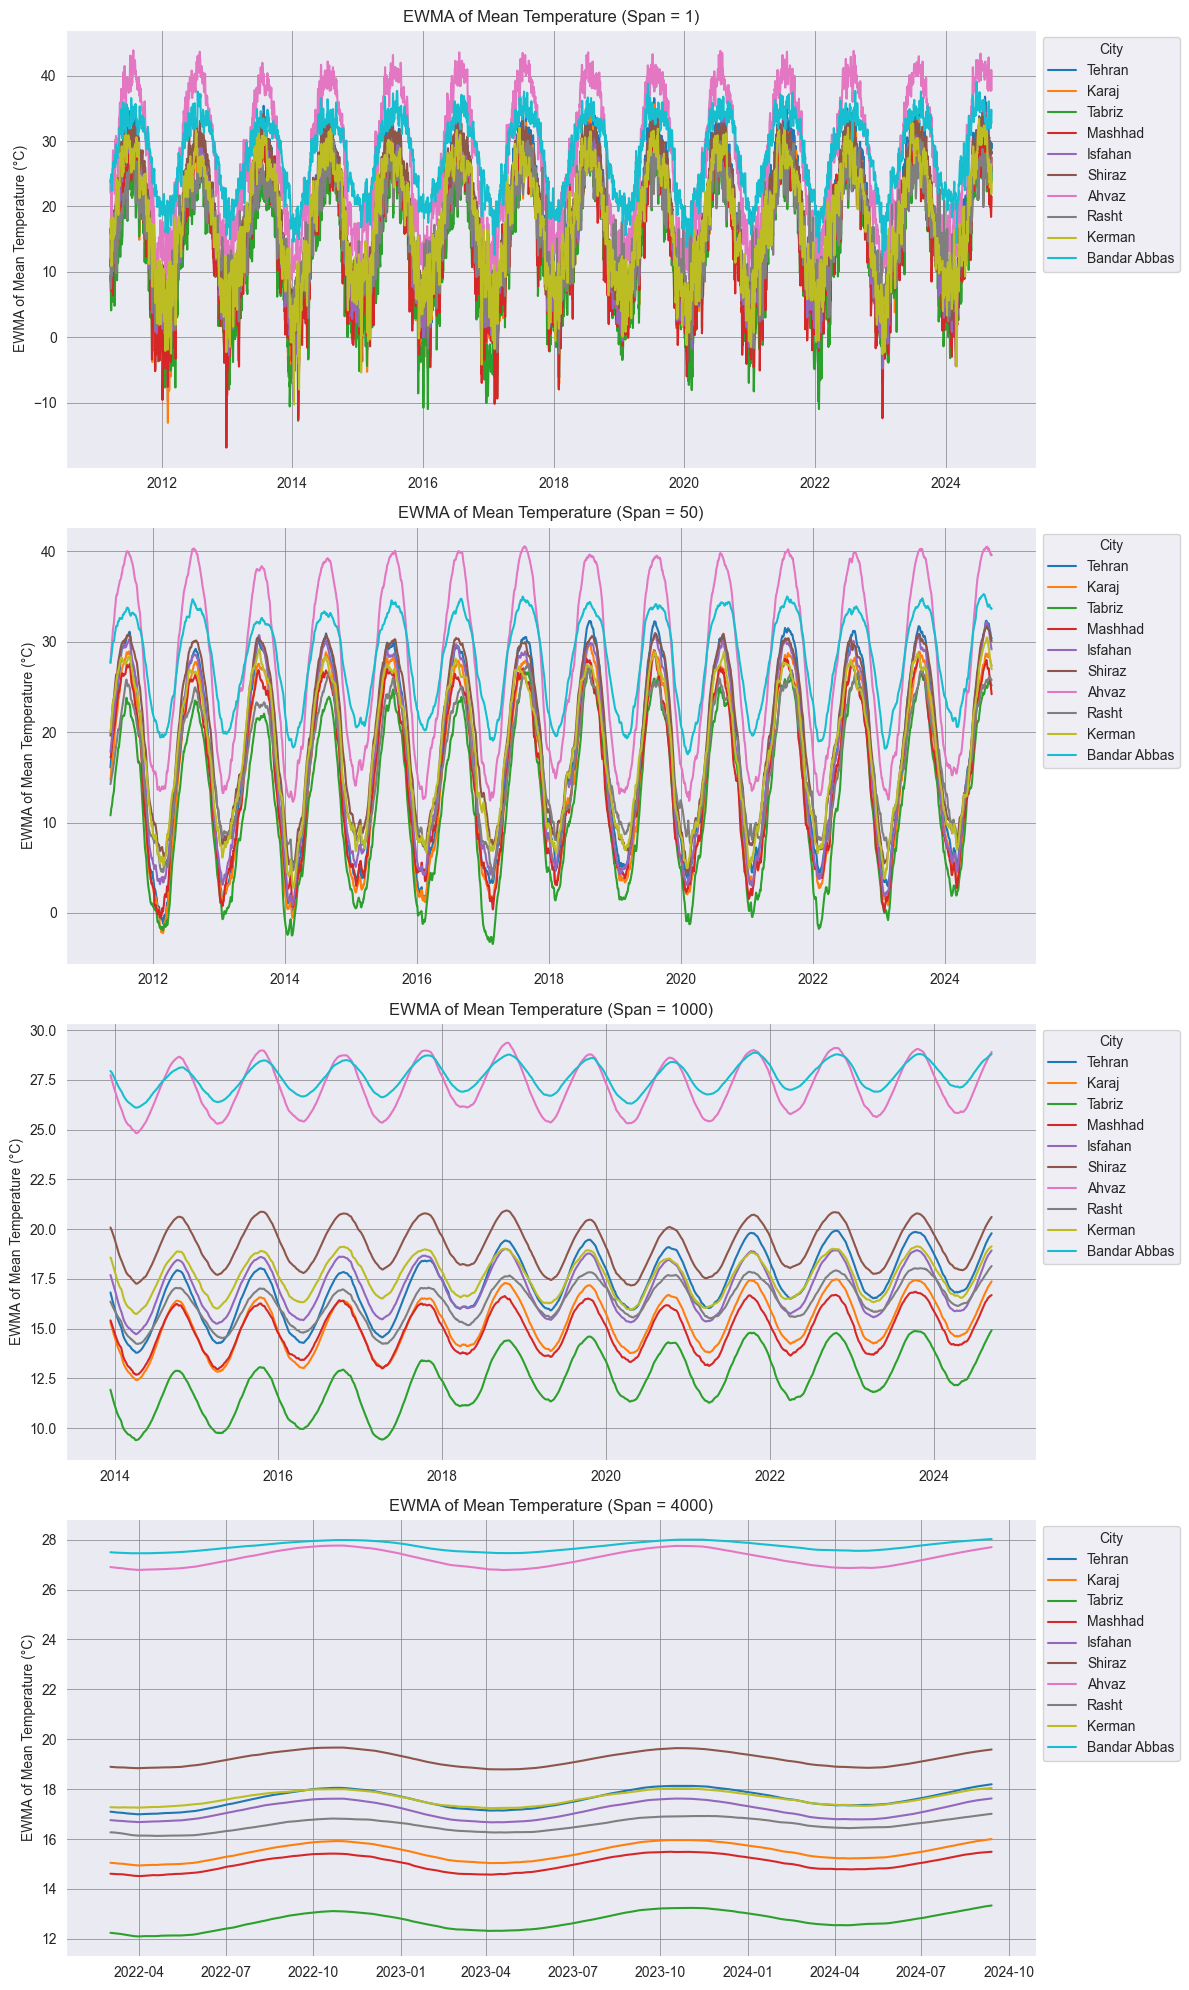

In [55]:
spans = [1, 50, 1000, 4000]
pallet = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

fig, axs = plt.subplots(len(spans), 1, figsize=(12, 20))
cities = df['city'].unique()

for i, span in enumerate(spans):
    for j, city in enumerate(cities):
        city_data = df[df['city'] == city].set_index('date')
        ewma_temp = city_data['temp_mean (°C)'].ewm(span=span).mean()
        
        # Determine the starting point for plotting
        start_index = ewma_temp.index[span - 1]
        axs[i].plot(ewma_temp.index[span - 1:], ewma_temp[span - 1:], label=city, color=pallet[j % len(pallet)])

    axs[i].set_title(f"EWMA of Mean Temperature (Span = {spans[i]})")
    axs[i].set_ylabel("EWMA of Mean Temperature (°C)")
    axs[i].legend(title="City", bbox_to_anchor=(1, 1), loc='upper left')
    axs[i].grid(True, color='gray', linewidth=0.5) 

plt.tight_layout()
plt.show()

del spans, pallet, axs, fig, city_data, ewma_temp, cities, start_index

**Analysis :**

The temperature trends across various cities in Iran reveal several key patterns. Ahvaz and Bandar Abbas consistently record the highest temperatures, with Ahvaz showing greater variability, reaching up to a 25°C difference compared to Bandar Abbas' 15°C. This suggests that Ahvaz's climate is more extreme, with sharper fluctuations over the year, likely influenced by its inland desert climate compared to the coastal moderation in Bandar Abbas.

Karaj and Mashhad, despite being geographically distinct, demonstrate remarkably similar temperature patterns, maintaining relatively lower temperatures compared to Rasht, Tehran, and the centrally located cities like Kerman, Isfahan, and Shiraz. Tehran, though not centrally situated geographically, often experiences higher temperatures than cities such as Isfahan and Rasht, indicating unique climatic factors that contribute to its elevated heat. This might be linked to urban heat island effects, given Tehran's dense urbanization and geographical factors such as the surrounding mountains.

Tabriz, notably, stands out as the coldest city among those analyzed, despite its proximity to cities like Mashhad and Karaj. Its consistently lower temperature highlights its distinct climate, which could be attributed to its elevation and latitude.

Interestingly, even with some observed variations or small offsets in data across years, all cities exhibit a similar overall temperature pattern, suggesting consistent seasonal influences on a national scale. This common pattern might indicate broader climatic events or typical seasonal temperature cycles that affect the entire country uniformly.

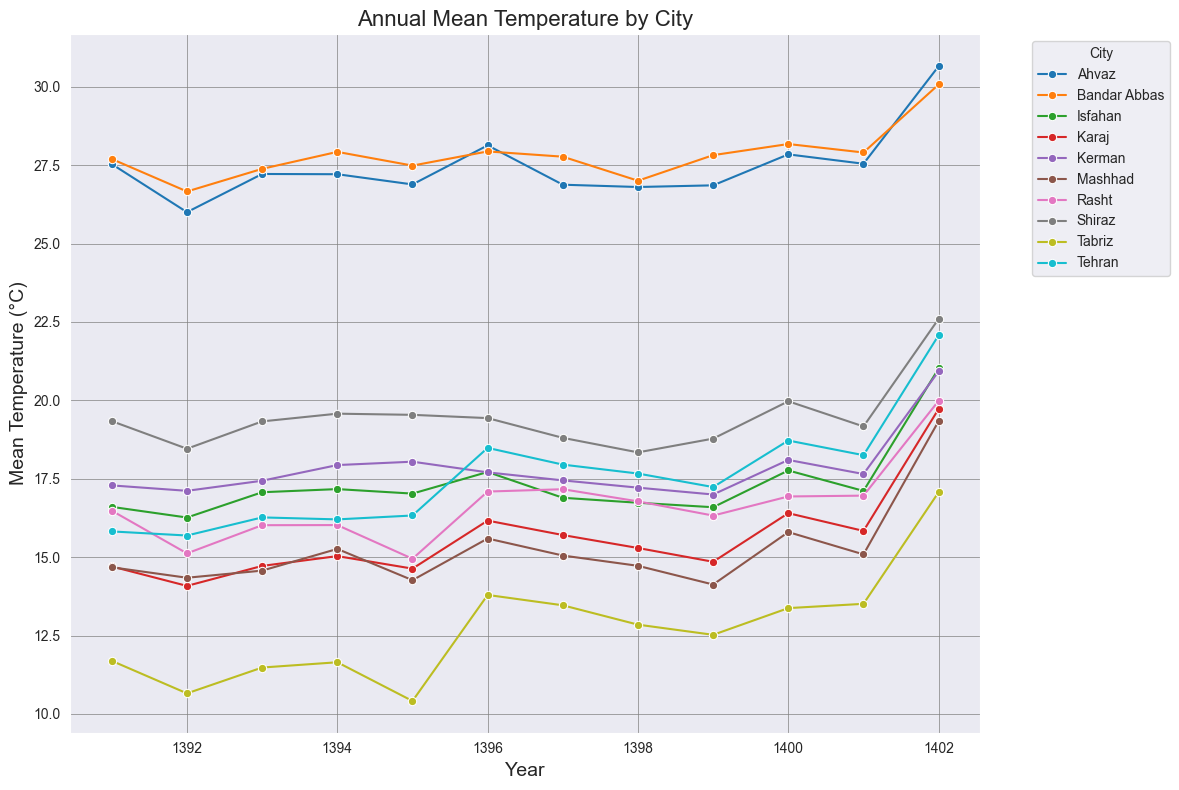

In [75]:
temp = df.copy()
temp = temp[(temp["date"] > "2012-03-21") & ("2024-01-01" > temp["date"])]
annual_mean_temp = temp.groupby(['year', 'city'])['temp_mean (°C)'].mean().reset_index()
annual_mean_temp = annual_mean_temp.sort_values(by=['year', 'city'])

plt.figure(figsize=(10, 8))

sns.lineplot(data=annual_mean_temp, x='year', y='temp_mean (°C)', hue='city', marker='o')
plt.title("Annual Mean Temperature by City", fontsize=16)
plt.xlabel("")
plt.ylabel("Mean Temperature (°C)", fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, color='gray', linewidth=0.5)
plt.show()

del temp, annual_mean_temp

**Analysis :**

The yearly mean temperature analysis from 1391 to 1402 reveals a consistent trend of rising temperatures across all cities, indicating a warming climate over the last decade. Particularly in the final year (1402), there was a notable increase in the yearly mean temperature for all cities, which aligns with global observations of rising temperatures potentially influenced by climate change.

Interestingly, while all cities generally show a similar long-term trend of temperature increase, their specific temperature changes do not always align perfectly year by year. This is evident in certain years—such as 1392, 1395, and 1399—where a dip in temperatures occurred across cities compared to the previous year, followed by an increase in the subsequent year. Such variations might be due to localized climate events, such as shifts in seasonal rainfall, unusual cold fronts, or other weather anomalies impacting specific regions differently.

The data shows that even within an overall warming trend, there are fluctuations at a regional level that cause variations in temperature behavior across cities, though not necessarily opposing trends. These variations are more about different magnitudes of change rather than opposing directions. For example, in 1395, while most cities experienced a dip in temperature compared to the previous and following years, Kerman did not exhibit this dip, suggesting unique regional influences affecting its climate differently. This highlights the complexity of regional climate patterns, where local factors such as geography, urbanization, and altitude can contribute to distinct weather behaviors. 

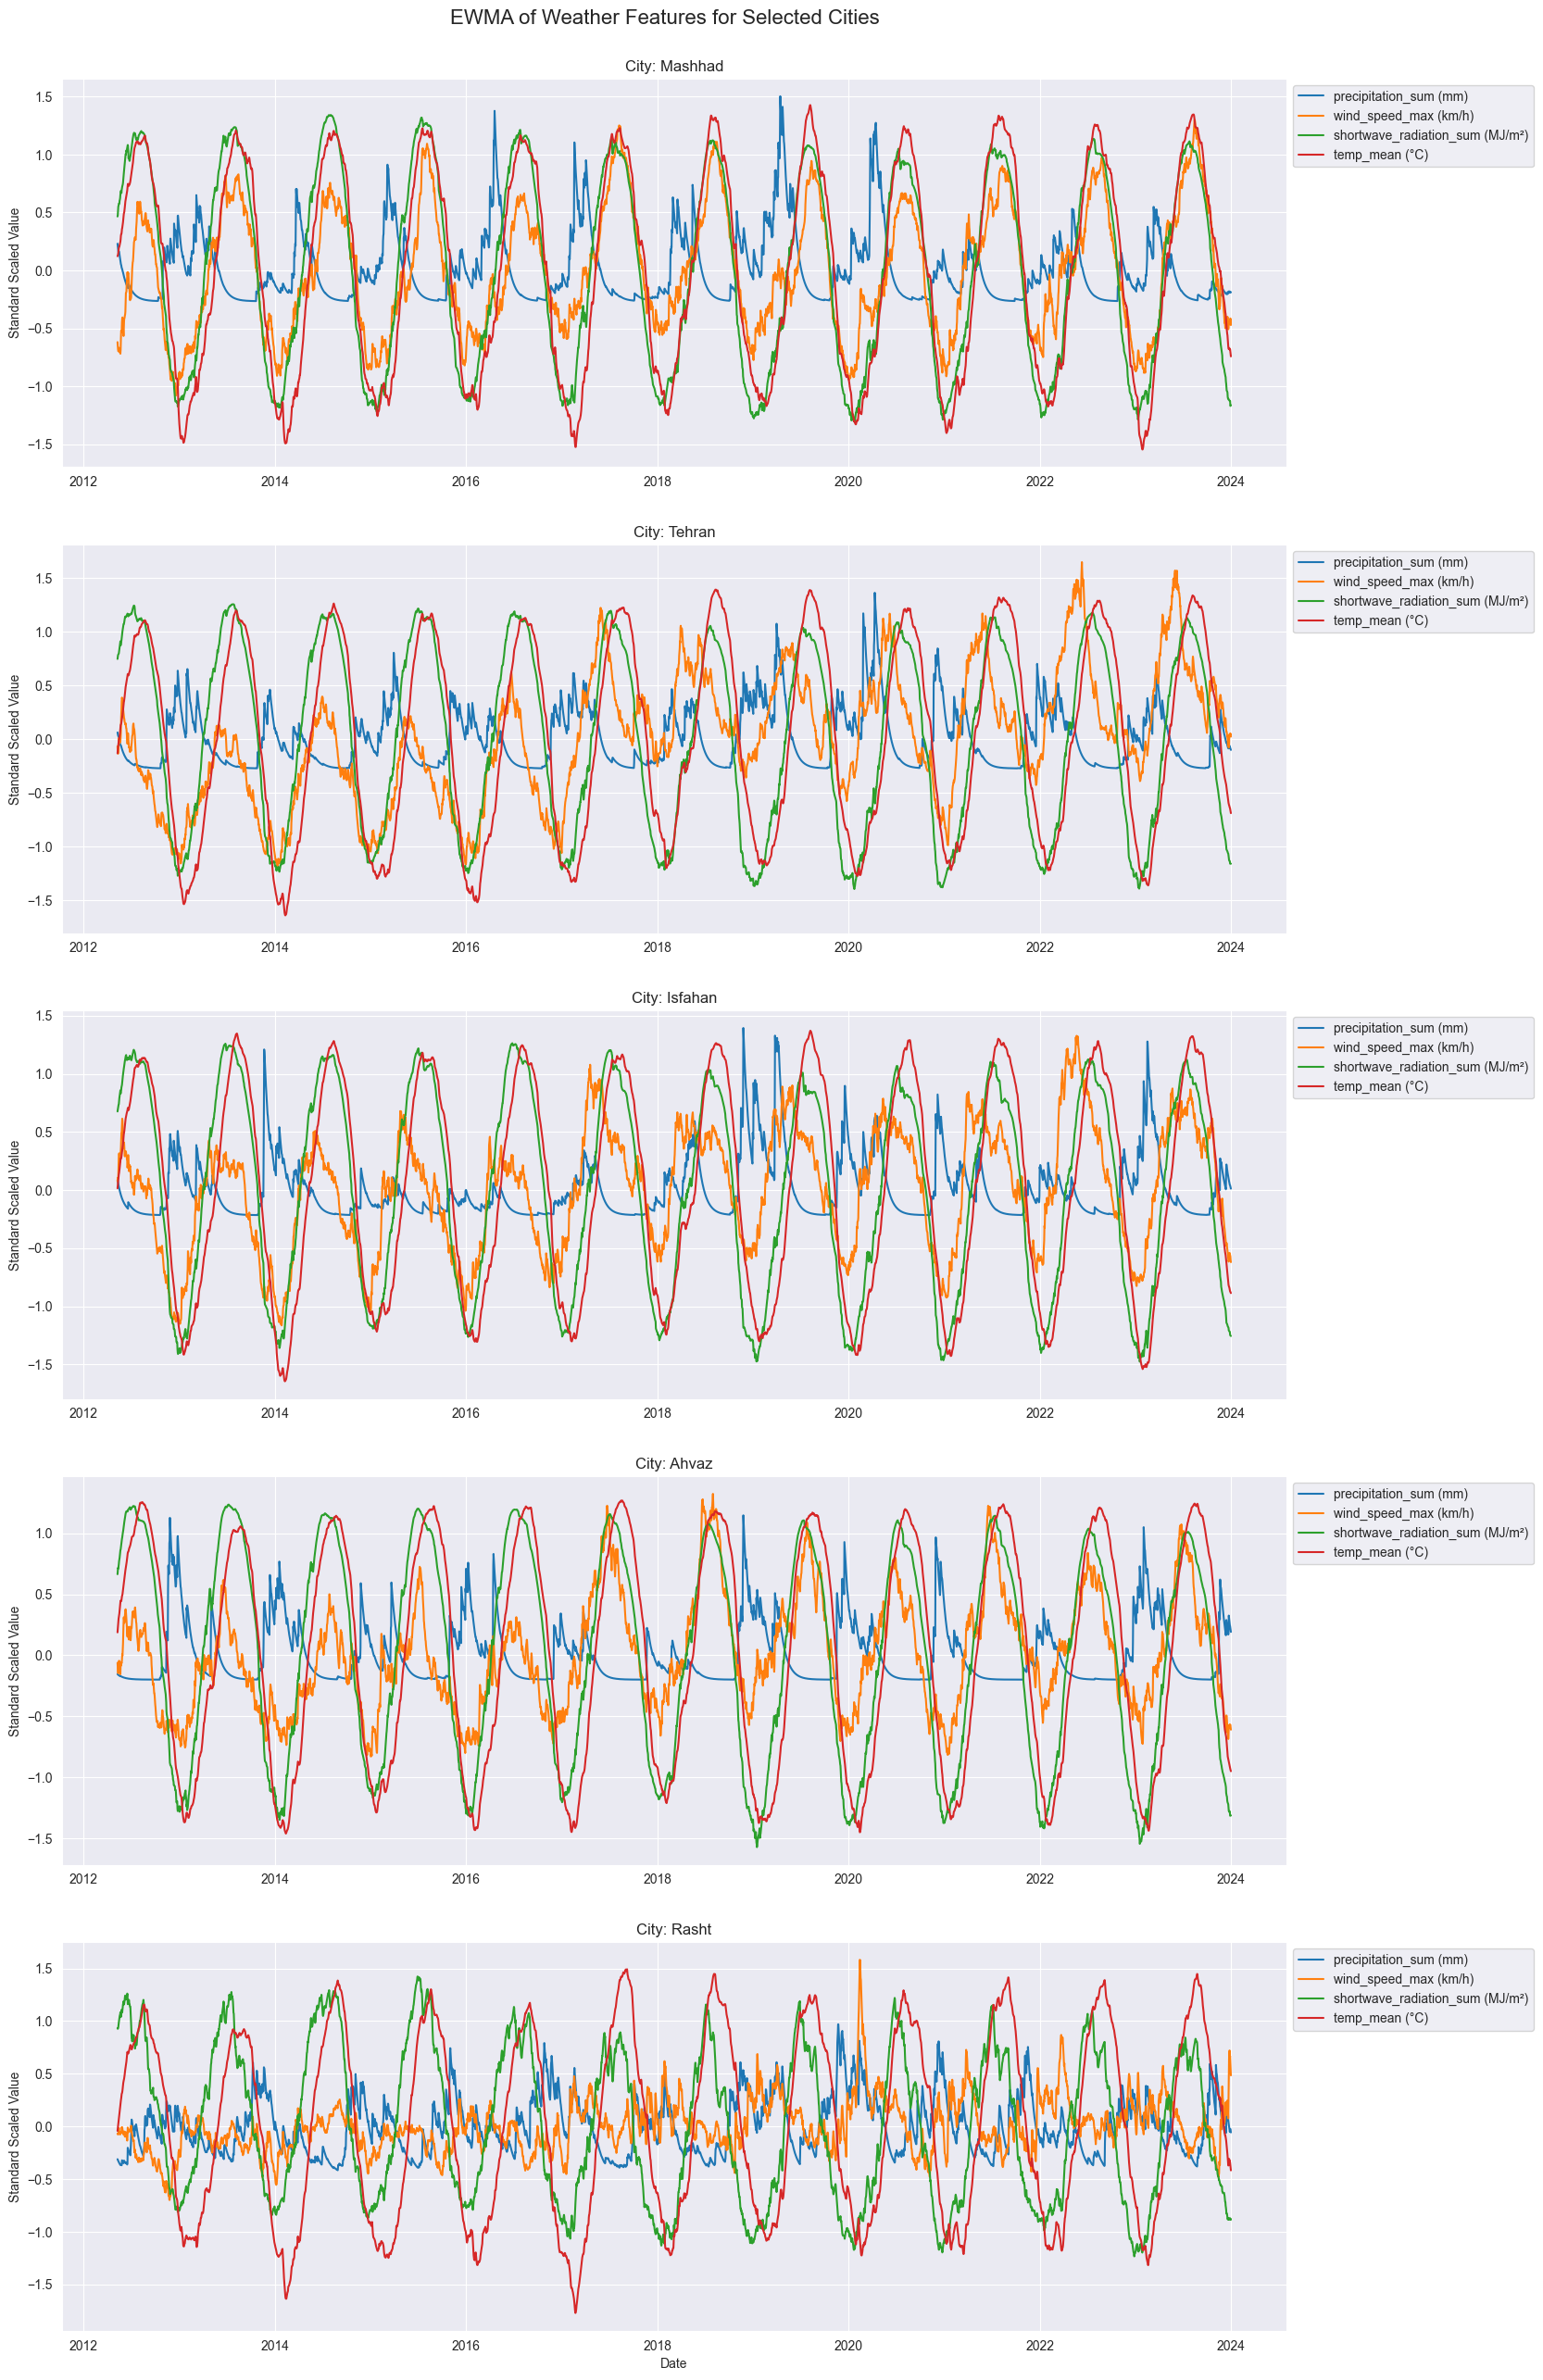

In [76]:
temp = df.copy()
temp = temp[(temp["date"] > "2012-03-21") & ("2024-01-01" > temp["date"])]
temp.set_index('date', inplace=True)
selected_cities = ["Mashhad", "Tehran", "Isfahan", "Ahvaz", "Rasht"]
temp = temp[temp['city'].isin(selected_cities)]
features = ["precipitation_sum (mm)", "wind_speed_max (km/h)", 
            "shortwave_radiation_sum (MJ/m²)", "temp_mean (°C)"]
scaler = StandardScaler()

fig, axes = plt.subplots(5, 1, figsize=(15, 26), sharex=True)
fig.tight_layout(pad=5.0)
axes = axes.flatten()  # Flatten the axes for easier indexing

span = 50

for i, city in enumerate(selected_cities):
    city_df = temp[temp['city'] == city].copy()
    
    scaled_features = scaler.fit_transform(city_df[features])
    scaled_df = pd.DataFrame(scaled_features, columns=features, index=city_df.index)
    ewma_df = scaled_df.ewm(span=span).mean()
    
    # Plot each feature starting from `span - 1` index
    ax = axes[i]
    start_index = span - 1  # Start after EWMA has had sufficient data points to stabilize
    for feature in features:
        ax.plot(ewma_df.index[start_index:], ewma_df[feature].iloc[start_index:], label=feature)

    ax.set_title(f'City: {city}')
    ax.set_ylabel('Standard Scaled Value')
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    ax.tick_params(axis='x', which='both', labelbottom=True)

axes[-1].set_xlabel('')
plt.suptitle('EWMA of Weather Features for Selected Cities', fontsize=16, y=1)
plt.show()

del i, city, selected_cities, start_index, city_df, scaler, scaled_df, scaled_features, features, temp

**Documentation :**

Mashhad, Isfahan, Ahvaz, Tehran, and Rasht have been selected as leading cities due to their representative climatic characteristics that reflect broader weather patterns in Iran. Each city illustrates unique temperature and precipitation behaviors, with Mashhad, Isfahan, and Rasht exhibiting diverse climate influences, while Ahvaz and Tehran represent hotter, drier conditions. Even though Tehran meant to be grouped with Mashhad but I've decided we need to have that in our Analysis as well due to its different climate behavior. Analyzing these cities provides valuable insights into regional climate trends, urbanization effects, and the broader implications of climate change in the area.

**Analysis :**

The analysis of the five selected cities—Mashhad, Isfahan, Ahvaz, Tehran, and Rasht—reveals intriguing patterns in temperature, shortwave radiation, wind speed, and precipitation. For the first four cities, temperature and shortwave radiation change in tandem, demonstrating a direct relationship where shortwave radiation typically influences temperature increases. This relationship is apparent as shortwave radiation appears to affect temperature more rapidly, suggesting that as sunlight increases, so does the heat in these cities. Wind speed also displays a similar direct relationship, with a notable trend where wind speeds tend to rise as winter transitions into spring, reflecting the seasonal changes in temperature.

Interestingly, 2019 marked a significant year for precipitation across these cities, which predominantly occurred in winter, indicating an indirect relationship with temperature and radiation. In other words, while temperature and radiation patterns rise and fall together, precipitation events are not directly influenced by these factors but are rather affected by seasonal climatic patterns.

Rasht, being close to the Caspian Sea, presents a unique case. The city experiences higher humidity levels and more frequent rainfall, particularly during winter and early spring. This leads to an indirect relationship between precipitation and temperature, as increased moisture can lead to rainfall when temperatures drop. Additionally, wind speed in Rasht behaves differently, as it is influenced by sea breezes that create localized wind patterns. While shortwave radiation and temperature still show a relationship similar to other cities, the higher humidity and cloud cover in Rasht can reduce incoming solar radiation, affecting local temperature dynamics. Overall, these findings highlight the complexity of climate interactions in different regions, emphasizing the role of local geography and meteorological factors in shaping weather patterns.

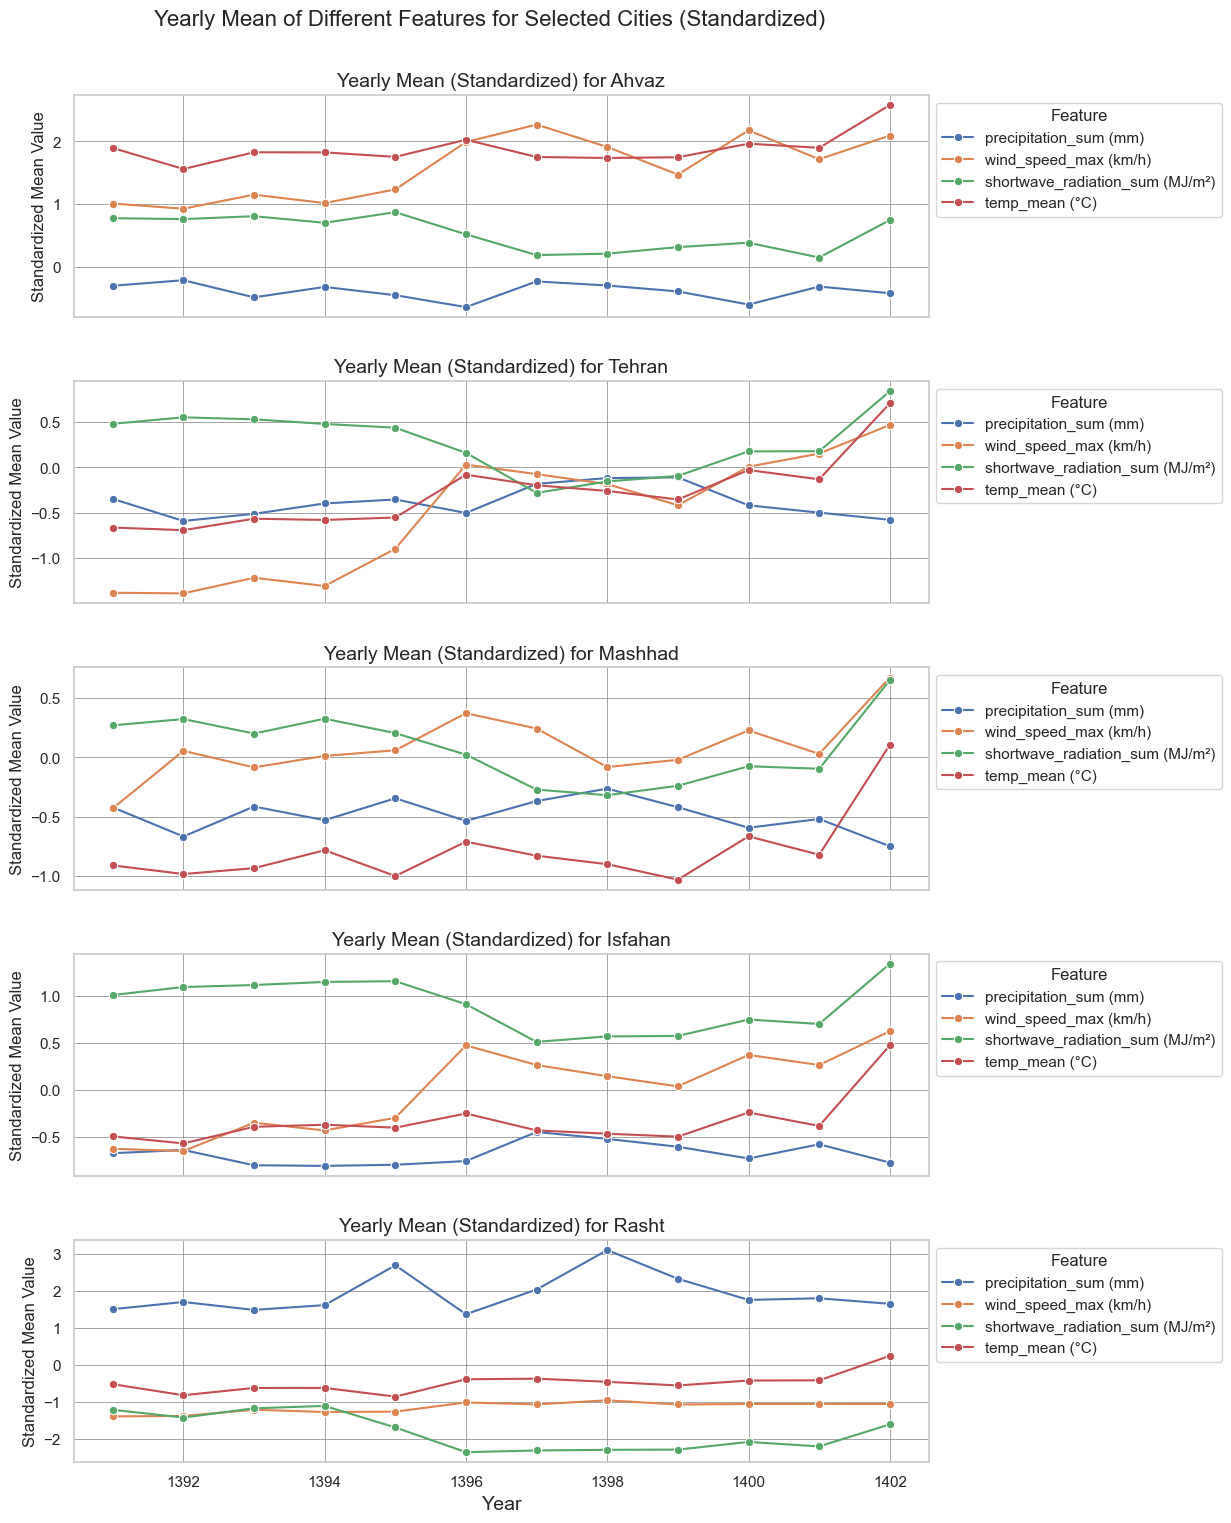

In [86]:
temp = df.copy()
temp = temp[(temp["date"] > "2012-03-21") & ("2024-01-01" > temp["date"])]
selected_cities = ["Ahvaz", "Tehran", "Mashhad", "Isfahan", "Rasht"]
temp = temp[temp['city'].isin(selected_cities)]
features = ["precipitation_sum (mm)", "wind_speed_max (km/h)", 
            "shortwave_radiation_sum (MJ/m²)", "temp_mean (°C)"]
annual_mean = temp.groupby(['year', 'city'])[features].mean().reset_index()
annual_mean = annual_mean.sort_values(by=['year', 'city'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(annual_mean[features])
scaled_df = pd.DataFrame(scaled_features, columns=features)
annual_mean_scaled = pd.concat([annual_mean[['year', 'city']], scaled_df], axis=1)

fig, axes = plt.subplots(5, 1, figsize=(10, 15), sharex=True)
fig.tight_layout(pad=3.0)

for i, city in enumerate(selected_cities):
    ax = axes[i]
    city_data = annual_mean_scaled[annual_mean_scaled['city'] == city]
    
    for feature in features:
        sns.lineplot(data=city_data, x='year', y=feature, marker='o', ax=ax, label=feature)

    ax.set_title(f'Yearly Mean (Standardized) for {city}', fontsize=14)
    ax.set_ylabel('Standardized Mean Value', fontsize=12)
    ax.grid(True, color='gray', linewidth=0.5)
    ax.legend(title="Feature", bbox_to_anchor=(1, 1), loc='upper left')

axes[-1].set_xlabel("Year", fontsize=14)
plt.suptitle('Yearly Mean of Different Features for Selected Cities (Standardized)', fontsize=16, y=1.02)
plt.show()

del temp, annual_mean, annual_mean_scaled, scaled_features, scaled_df, selected_cities, features, i, city, city_data

### Temperature Distribution

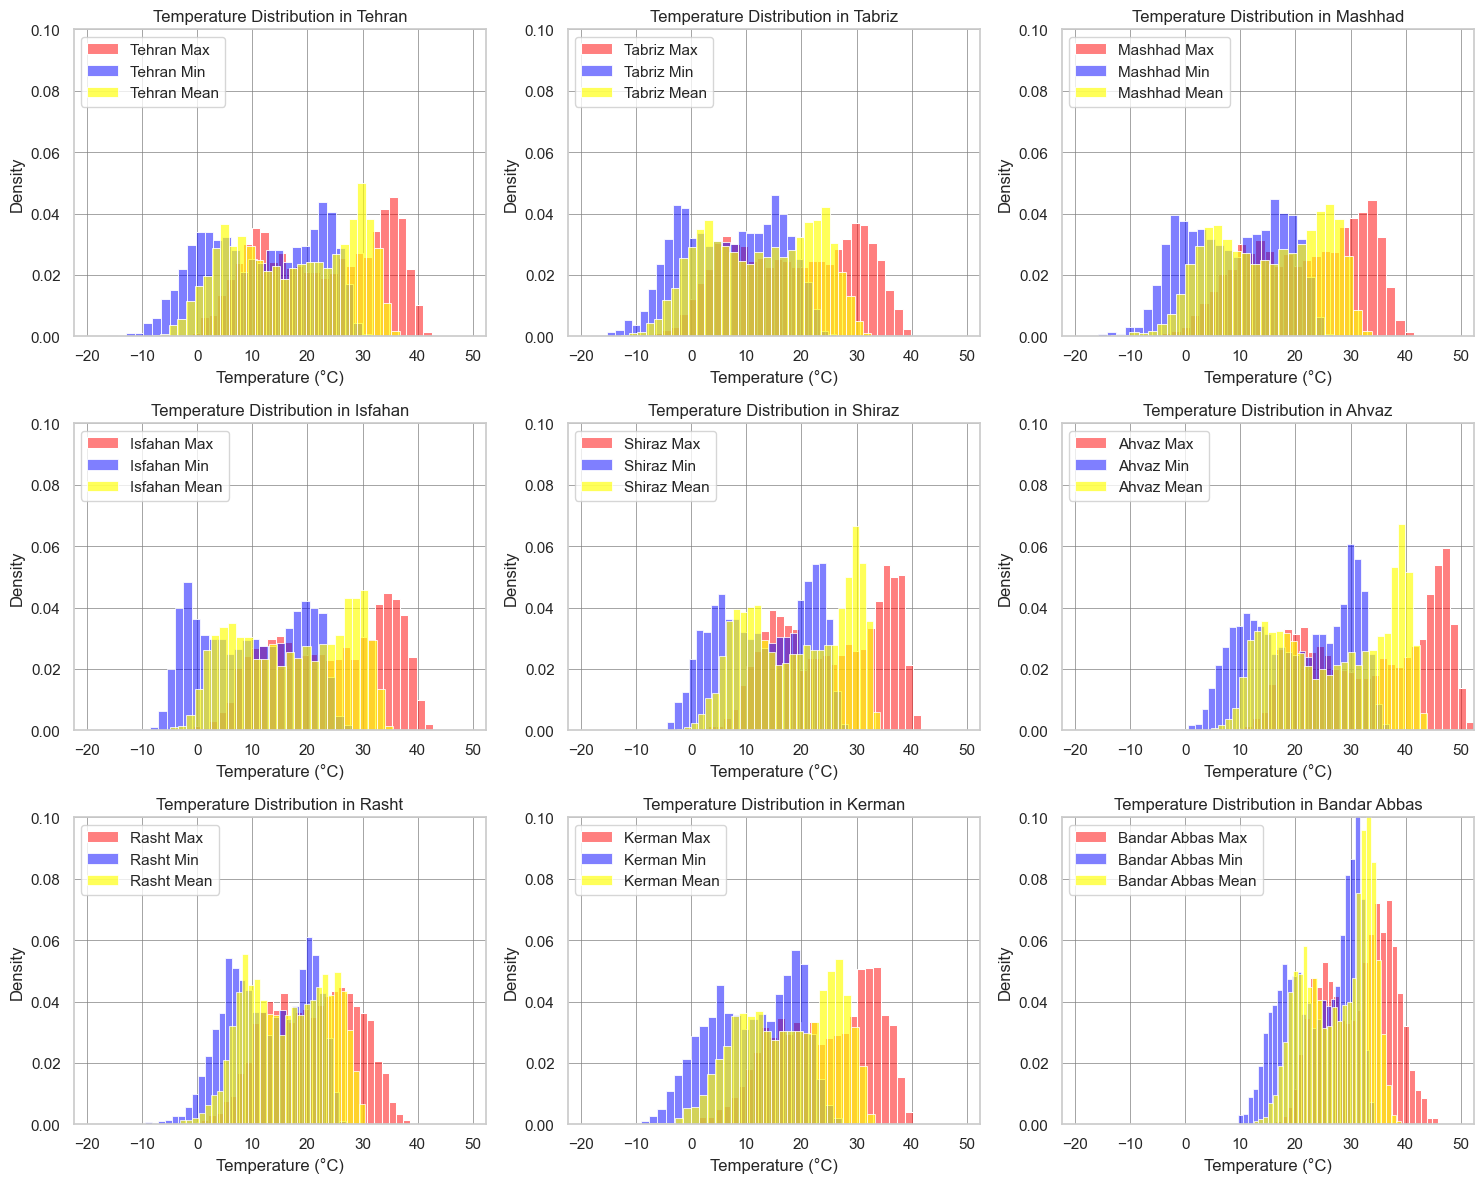

In [81]:
cities = [city for city in df['city'].unique() if city != 'Karaj']
overall_min = df[['temp_min (°C)', 'temp_mean (°C)', 'temp_max (°C)']].min().min()
overall_max = df[['temp_min (°C)', 'temp_mean (°C)', 'temp_max (°C)']].max().max()

plt.figure(figsize=(15, 12))
sns.set(style="whitegrid")

for i, city in enumerate(cities, 1):
    plt.subplot(3, 3, i)
    subset = df[df['city'] == city]
    
    sns.histplot(subset['temp_max (°C)'], bins=30, kde=False, color='red', alpha=0.5, label=f'{city} Max', stat='density')
    sns.histplot(subset['temp_min (°C)'], bins=30, kde=False, color='blue', alpha=0.5, label=f'{city} Min', stat='density')
    sns.histplot(subset['temp_mean (°C)'], bins=30, kde=False, color='yellow', alpha=0.65, label=f'{city} Mean', stat='density')

    # Set x and y limits for uniformity
    plt.xlim(overall_min, overall_max)
    plt.ylim(0, 0.1) 

    plt.title(f'Temperature Distribution in {city}')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Density')
    plt.legend(loc='upper left')
    plt.grid(True, color='gray', linewidth=0.5)

plt.tight_layout()
plt.show()

del cities, subset, overall_max, overall_min

**Analysis :**

this distribution plot for maximum, minimum, and mean temperatures across the selected cities reveals several significant insights into their climatic patterns. Isfahan, Tabriz, and Mashhad demonstrate a notable density in minimum temperatures, particularly reaching around -5°C, likely occurring during the colder winter months. In contrast, Ahvaz leads in maximum temperatures, with a frequent occurrence of 50°C and a peak around 45°C, indicating its hotter climate compared to Bandar Abbas, which is also evident in earlier daily temperature plots.

For mean temperatures, Tehran, Shiraz, and Isfahan show a predominant value of 30°C during summer and 5°C in winter, reflecting typical seasonal variations. Ahvaz displays a mean temperature of 40°C in summer and a range of 10-20°C during winter, while Bandar Abbas has a mean of 35°C in summer, standing out as the highest among the cities, and around 20°C in winter. These insights highlight the distinct temperature profiles of each city, emphasizing the influence of seasonal changes and geographical factors on their climate.

### Seasonal Analysis 

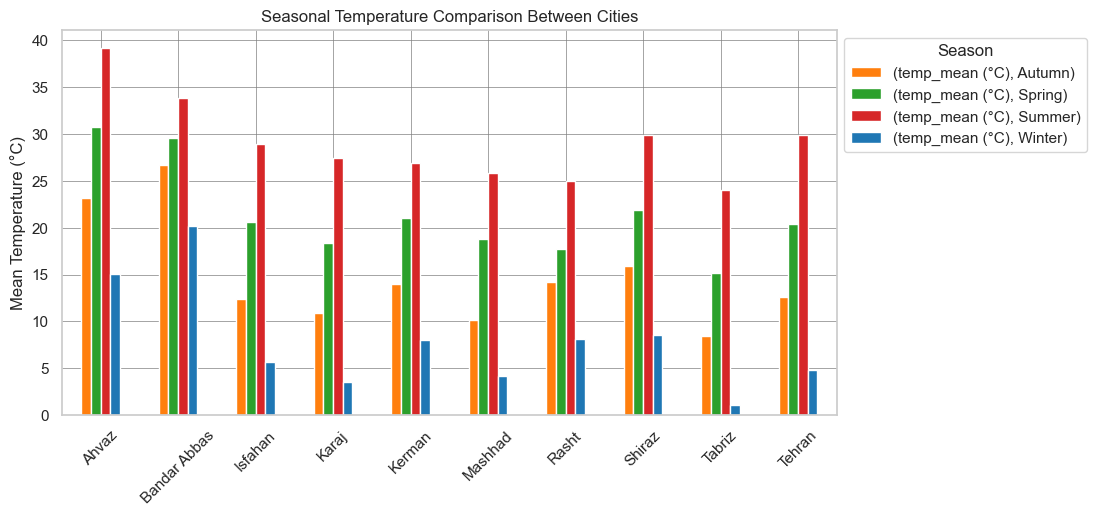

In [98]:
city_season_trends = df.groupby(['city', 'season']).agg({
    'temp_mean (°C)': 'mean',
}).unstack()

pallet = ['#ff7f0e', '#2ca02c', '#d62728', '#1f77b4']
ax = city_season_trends.plot(kind='bar', figsize=(10, 5), color=pallet)

plt.title("Seasonal Temperature Comparison Between Cities")
plt.xlabel("")
plt.ylabel("Mean Temperature (°C)")
plt.legend(title="Season", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True, color='gray', linewidth=0.5) 
plt.xticks(rotation=45)
plt.show()

del city_season_trends

#### Temperature Distance:

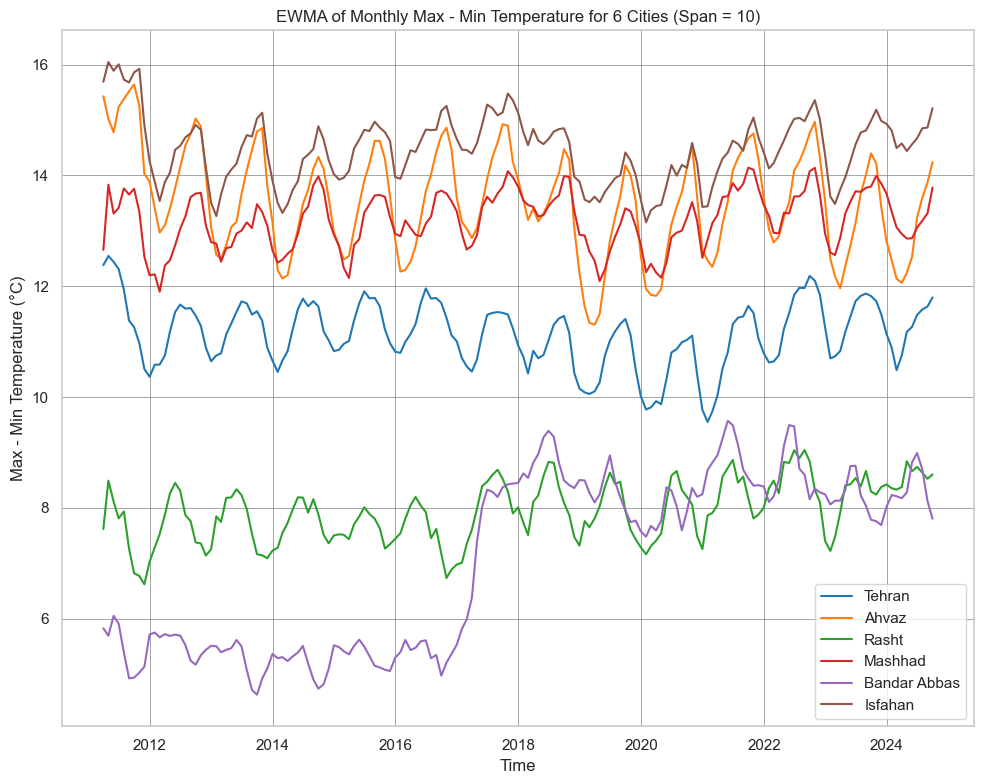

In [88]:
important_cities = ['Tehran', 'Ahvaz', 'Rasht', 'Mashhad', 'Bandar Abbas', 'Isfahan']
filtered_data = df[df['city'].isin(important_cities)]
span = 10
pallet = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9569bd', '#8c564b']

plt.figure(figsize=(10, 8))

for idx, city in enumerate(important_cities):
    city_data = filtered_data[filtered_data['city'] == city]
    city_monthly = city_data.resample('ME', on='date').mean(numeric_only=True)
    ewma_max_minus_min = city_monthly['temp_diff (°C)'].ewm(span=span).mean()
    plt.plot(ewma_max_minus_min.index, ewma_max_minus_min, label=city, color=pallet[idx])

plt.title(f"EWMA of Monthly Max - Min Temperature for {len(important_cities)} Cities (Span = {span})")
plt.xlabel("")
plt.ylabel("Max - Min Temperature (°C)")
plt.legend()
plt.grid(True, color='gray', linewidth=0.5)  
plt.tight_layout()
plt.show()

del important_cities, filtered_data, pallet, span, city_data, city_monthly, ewma_max_minus_min

**Analysis :**

The plot illustrating the differences between maximum and minimum temperatures reveals surprising patterns among the selected cities, with all except Bandar Abbas exhibiting similar yearly fluctuations. Bandar Abbas initially followed these patterns until 2017, when a sudden increase in the temperature range of approximately 5°C occurred, and this elevated variation has persisted since. This unusual shift correlates with broader climate change impacts in the region, characterized by rising temperatures and changing weather patterns. Based on research, the average annual temperature in Bandar Abbas is now around 27.5°C, with a rising trend of 0.2°C per decade. These climatic changes have resulted in longer, hotter summers and shorter winters, increasing the demand for energy and exacerbating health risks. Additionally, the region is facing challenges such as coastal erosion and extreme weather events, which are impacting the local environment and economy. Adapting to these changes is crucial for ensuring the city's future resilience.

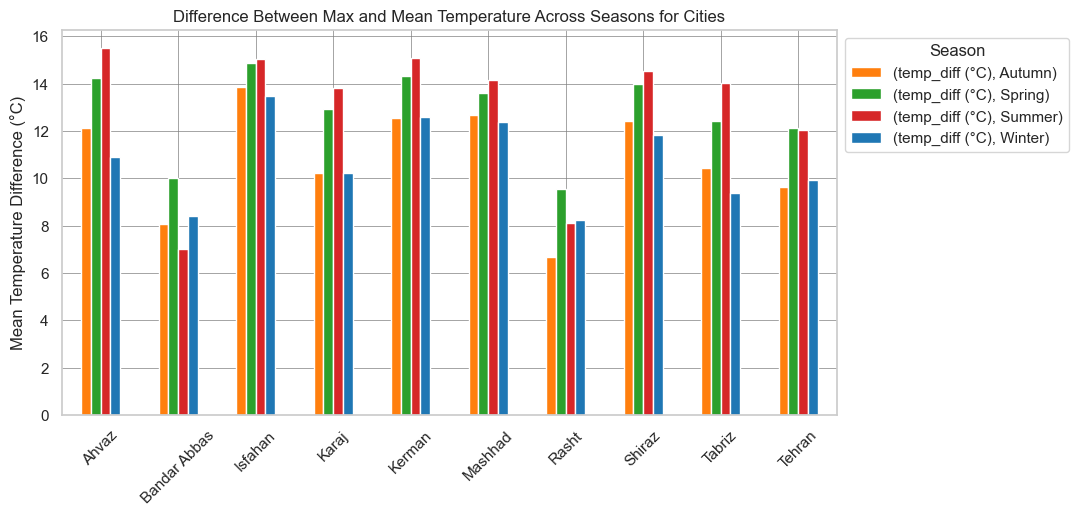

In [97]:
temp = df.copy()
temp = temp[temp["date"] >= "2018-01-01"]
city_season_trends = temp.groupby(['city', 'season']).agg({'temp_diff (°C)': 'mean'}).unstack()
pallet = ['#ff7f0e', '#2ca02c', '#d62728', '#1f77b4']

ax = city_season_trends.plot(kind='bar', figsize=(10, 5), color=pallet)

plt.title("Difference Between Max and Mean Temperature Across Seasons for Cities")
plt.xlabel("")
plt.ylabel("Mean Temperature Difference (°C)")
plt.xticks(rotation=0)
plt.legend(title="Season", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True, color='gray', linewidth=0.5) 
plt.xticks(rotation=45)
plt.show()

del city_season_trends, pallet, ax, temp

**Documentation :**

for this specific seasonal difference trend, i've decided to use data after 2018 based on previous climate change on Bandar Abbas

#### Seasonal Box-Plot:

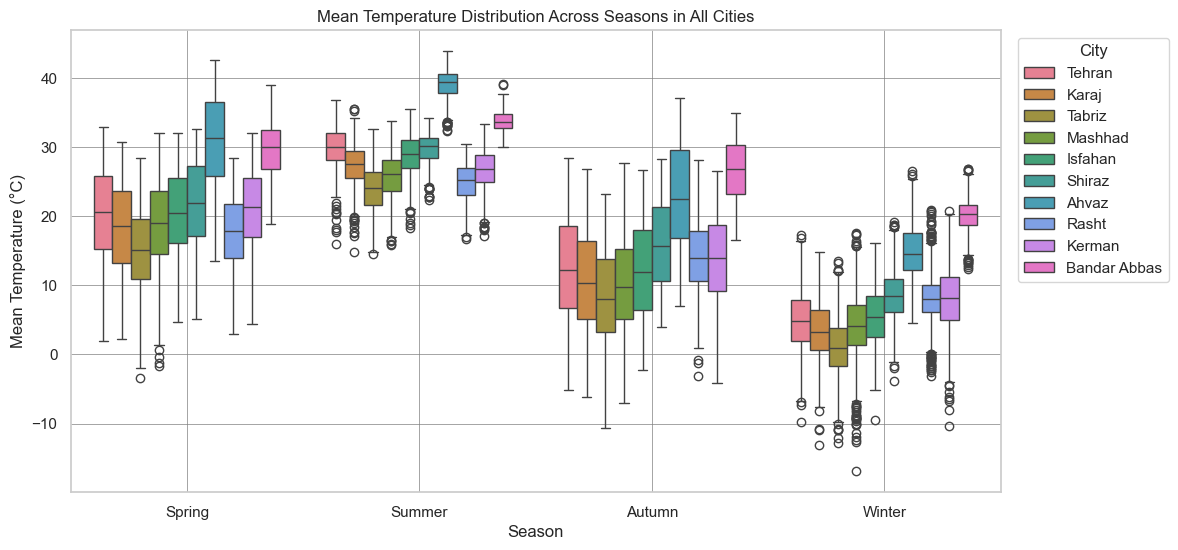

In [99]:
plt.figure(figsize=(12, 6))
sns.set_palette('rainbow')
sns.boxplot(x='season', y='temp_mean (°C)', hue='city', data=df)
plt.title("Mean Temperature Distribution Across Seasons in All Cities")
plt.ylabel("Mean Temperature (°C)")
plt.xlabel("Season")
plt.legend(title='City', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True, color='gray', linewidth=0.5) 
plt.show()

**Documentation on Outlier Treatment :**

In the analysis of the temperature data, the so-called outliers were identified as offsets rather than errors. Given the nature of time-series data, where weather patterns often exhibit variability influenced by various climatic factors, it was crucial to retain these offsets. Removing or reducing them could have led to a misrepresentation of the underlying trends and correlations within the dataset. By keeping these offsets, I ensured that the analysis reflects the true relationships among temperature and other weather features over time. This approach allows for a more accurate assessment of how these variables interact and contributes to a deeper understanding of the climatic behavior across the selected cities. Maintaining the integrity of the dataset in this way supports the reliability of the findings and strengthens the conclusions drawn from the analysis.


**Analysis :**

The box plots reveal several important insights regarding temperature distributions across the selected cities throughout the seasons. Notably, Bandar Abbas experiences the highest temperatures during winter and autumn compared to all other cities, while Ahvaz leads in summer and spring temperatures. Tehran and Isfahan exhibit similar temperature patterns across all seasons, indicating consistent climatic behavior. Interestingly, Kerman and Rasht display the same mean temperatures in winter and autumn; however, Kerman showcases greater variability in temperature during these seasons.

Additionally, Tabriz stands out as the coldest city in all four seasons, aligning with earlier analyses that highlighted its consistently lower temperature profiles. This comprehensive view of temperature distributions enhances our understanding of the climatic characteristics unique to each city, allowing for more informed interpretations of the data.

### Correlation Heatmap

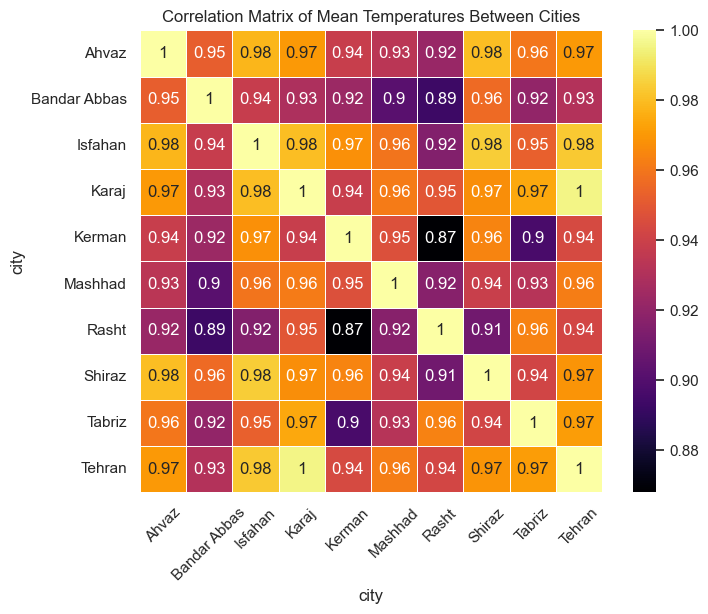

In [103]:
df_pivot = df.pivot_table(index='date', columns='city', values='temp_mean (°C)')
correlation_matrix = df_pivot.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="inferno", linewidths=0.5, square=True)
plt.title('Correlation Matrix of Mean Temperatures Between Cities')
plt.xticks(rotation=45)
plt.show()

del correlation_matrix, df_pivot

**Analysis :**

The correlation heatmap illustrates a strong positive relationship between the temperatures of the selected cities, with all cities exhibiting a correlation coefficient higher than 0.87. This indicates a significant direct relationship in temperature trends across these locations. Notably, some cities approach a correlation of 1, suggesting almost perfect alignment in their temperature changes. Interestingly, while Karaj and Tehran have different climatic conditions—Tehran generally being hotter than Isfahan across most seasons—their correlation remains precisely 1. This unique observation underscores the intricate dynamics of temperature behavior in these cities, highlighting the influence of various factors that may contribute to their temperature patterns despite their apparent differences.